In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy


In [2]:
# Automatically parse dates and use the first column as index (Year in this dataset)
df=pd.read_csv("epa-sea-level.csv",
              parse_dates=True,
              index_col=0)
#print(df.info())
#print(df.head())
df.tail()

,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
Year,,,,
2009-01-01,8.586614,8.311024,8.862205,8.046354
2010-01-01,8.901575,8.618110,9.185039,8.122973
2011-01-01,8.964567,8.661417,9.267717,8.053065
2012-01-01,9.326772,8.992126,9.661417,8.457058
2013-01-01,8.980315,8.622047,9.338583,8.546648


In [3]:
# We don't need data parsing in this example.
df=pd.read_csv("epa-sea-level.csv")
#print(df.info())
#print(df.head())
df.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648


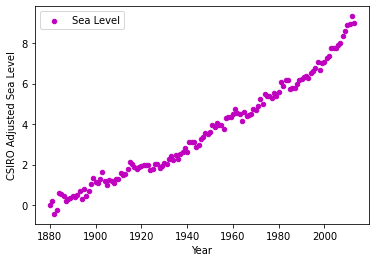

In [4]:
# Scatter Plot - Option 1 - Using Dataframe plot function

ax = df.plot.scatter(x="Year",y="CSIRO Adjusted Sea Level", c="m", label="Sea Level")    # Returns AxesSubPlot
print(ax.get_title())



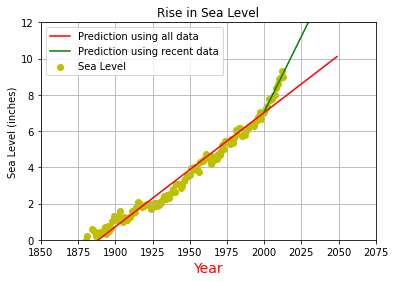

In [7]:
# Scatter Plot - Option 2 - Using pyplot directly

plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"], c="y", label="Sea Level")
plt.xlabel('Year', fontsize=14, color='red')
plt.ylabel('Sea Level (inches)')
plt.title("Rise in Sea Level")
plt.axis([1850.0, 2075.0, 0, 12])
plt.grid(True)
plt.legend(loc='upper left')

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
#plt.plot(df["Year"], intercept + slope*df["Year"], 'r', label='fitted line')

# Create new Panda Series till 2050 for predicting future
years = df["Year"]
more = pd.Series([ii for ii in range(df["Year"].max() + 1, 2050)])
years = years.append(more)
#print(years)

# Now plot a line  that predicts the sealevel till 2050 using current slope
plt.plot(years, intercept + slope*years, 'r', label='Prediction using all data')    # r for red
plt.legend(loc='upper left')


# Predict using data from year 2000 through the most recent year
df1 = df.query("Year > 1999")
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df1["Year"], df1["CSIRO Adjusted Sea Level"])
years = df1["Year"]
years = years[years > 1999]
more = pd.Series([ii for ii in range(df1["Year"].max() + 1, 2050)])
years = years.append(more)
years = years.reset_index(drop=True)
plt.plot(years, intercept + slope*years, 'g-', label='Prediction using recent data')    # g for green
plt.legend(loc='upper left')

ax = plt.gca()
#print(ax.get_title())

plt.show()

#print(ax.get_lines()[0].get_ydata().tolist())
#print(ax.get_lines()[1].get_ydata().tolist())



In [6]:
# Once the plot is rendered, you can draw the next one using same API.

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 7 Text major ticklabel objects>)

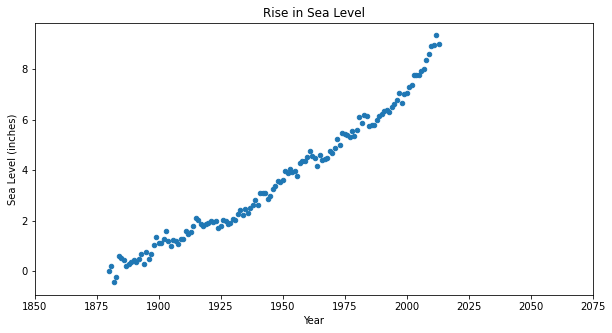

In [8]:
# Scatter Plot - Option 3. Specify the size and pass it.

fig, ax= plt.subplots(figsize=(10,5))
df.plot.scatter(x="Year",y="CSIRO Adjusted Sea Level", ax=ax)
ax.set_title("Rise in Sea Level")
ax.set_ylabel('Sea Level (inches)')
plt.xticks([1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0, 2075.0])
plt.yticks(fontsize = 10)
